# Allocine - Data Visualization Project
Dans ce notebook nous tenterons d'analyser le jeu de données Allocine et nous présenterons 4 graphiques clés et un réseau pour comprendre les différentes relations dans ce dataframe. 

Lien du Dépot GitHub : [https://github.com/aurvl/DA_projects/blob/main/Allocine/Allocine.md](https://github.com/aurvl/DA_projects/blob/main/Allocine/Allocine.md)

## Chargement des librairies
Les librairies que nous utiliserons dans ce notebook sont :

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import networkx as nx

Ensuite on importe notre dataframe (df) et on jette petit aperçu sur ses 5 premières lignes

In [26]:
df = pd.read_excel("Base_allocine.xlsx")
df.head()

,Titre,Nationality,Channel,Actor,Genre,Duration,Date
0,Bloodline (2015),U.S.A.,Netflix,Kyle Chandler;Linda Cardellini;Ben Mendelsohn,"Drame , Thriller",42min,2015 - 2017
1,The Fosters,U.S.A.,Freeform,Teri Polo;Sherri Saum;Jake T. Austin,"Drame , Famille",42min,2013 - 2018
2,Marvel's Luke Cage,U.S.A.,Netflix,Mike Colter;Simone Missick;Alfre Woodard,"Fantastique , Action",52min,2016 - 2018
3,The Hollow Crown,Grande-Bretagne,BBC Two,Jamie Ballard;James Fleet;Judi Dench,"Drame , Historique",130min,2012 - 2016
4,Future Man,U.S.A.,Hulu,Josh Hutcherson;Eliza Coupe;Derek Wilson,"Comédie , Science fiction",25min,2017 - 2020


## Partie 1 : Représentations graphiques
Dans cette partie nous présenterons 4 graphiques : 
- Un graphique pour représenter le nombre d'apparition des acteurs présent dans plus de 2 films

- Le second graphique présenterons le Nombre de saisons d'un film en fonction de la chaine de diffusion

- Le 3e graphique va s'articluer autour de la durée des films en fonction de leur genre

- Et le dernier permettra de mieux appréhender le nombre de séries diffusées par année

### **Nom des acteurs et leur nombre d'apparitions**

D'abord on crée une list dans laquelle on va stocker les noms des acteurs séparément

In [27]:
lit = []
for i in df['Actor']:
    if isinstance(i, str):
        separate = i.split(";")
        for a in separate:
            lit.append(a)
    else:
        lit.append(i)

print(lit[:30])

['Kyle Chandler', 'Linda Cardellini', 'Ben Mendelsohn', 'Teri Polo', 'Sherri Saum', 'Jake T. Austin', 'Mike Colter', 'Simone Missick', 'Alfre Woodard', 'Jamie Ballard', 'James Fleet', 'Judi Dench', 'Josh Hutcherson', 'Eliza Coupe', 'Derek Wilson', 'Maimie McCoy', 'Luke Pasqualino', 'Tom Burke', 'Nathan Fillion', 'Stana Katic', 'Molly C. Quinn', 'Kathy Bates', 'Nate Corddry', 'Christopher McDonald', 'Jonathan Groff', 'Frankie J. Alvarez', 'Murray Bartlett', 'Danny McBride', 'John Hawkes', 'Katy Mixon']


On convertis la lite en dataframe pour lui appliquer la fonction value_counts() qui compte le nombre de fois qu'une modalité est retrouvée dans la colonne spécifiée (en l'occurence ActorName)

In [28]:
df_list = pd.DataFrame(lit, columns=["ActorName"])
counts = df_list['ActorName'].value_counts()
counts = counts[counts >= 2] # Ici seul ceux qui ont une apparition > 2 sont sélectionnés

Enfin on plot le résultat obtenue à l'aide d'un barplot

<function matplotlib.pyplot.show(close=None, block=None)>

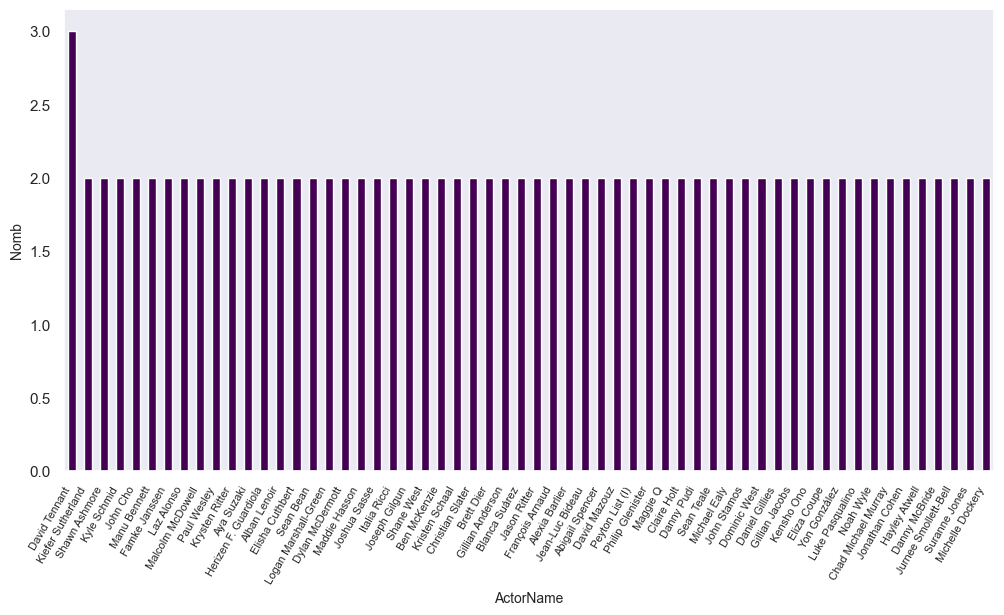

In [29]:
counts.plot(kind='bar', colormap='viridis', figsize=(12, 6))
sns.set_theme(style="dark")
plt.xlabel('ActorName', fontsize = 10)
plt.ylabel('Nomb', fontsize = 10)
plt.xticks(rotation=60, fontsize=8, ha= 'right')
plt.show

### **Nombre de saisons par chaine**

Dans un premier temps les date (en format debut - fin) sont séparés et stockées dans deux lists
Pour ce faire, deux patern sont recherchés Dans la colonne 'Date'

In [30]:
pat1 = "(.*?) -" # Celui avant le tiret (date de debut)
pat2 = "- (.*?) " # ET celui après (date de fin)

L1 = [] # Nos deux listes pour stocker les dates
L2 = []

On boucle ensuite sur chaque element de la colonne 'Date' pour récupérer chaque élément

In [31]:
for i in df['Date']:
    sy = re.findall(pat1, i)
    ey = re.findall(pat2, i)
    L1.append(sy[0])
    L2.append(ey[0])

# chaque valeur de L1 & L2 sont ensuite convertis en integer et ajoutées au df (a travers deux nouvelles colonnes)
L1 = [int(x) for x in L1]
L2 = [int(x) for x in L2]
df['StartY']=L1
df['EndY']=L2

Le nombre de saisons est ainsi calculé en soustrayant la date de fin à  celle du debut

In [32]:
df['Saison'] = df['EndY'] - df['StartY']
df.head()

,Titre,Nationality,Channel,Actor,Genre,Duration,Date,StartY,EndY,Saison
0,Bloodline (2015),U.S.A.,Netflix,Kyle Chandler;Linda Cardellini;Ben Mendelsohn,"Drame , Thriller",42min,2015 - 2017,2015,2017,2
1,The Fosters,U.S.A.,Freeform,Teri Polo;Sherri Saum;Jake T. Austin,"Drame , Famille",42min,2013 - 2018,2013,2018,5
2,Marvel's Luke Cage,U.S.A.,Netflix,Mike Colter;Simone Missick;Alfre Woodard,"Fantastique , Action",52min,2016 - 2018,2016,2018,2
3,The Hollow Crown,Grande-Bretagne,BBC Two,Jamie Ballard;James Fleet;Judi Dench,"Drame , Historique",130min,2012 - 2016,2012,2016,4
4,Future Man,U.S.A.,Hulu,Josh Hutcherson;Eliza Coupe;Derek Wilson,"Comédie , Science fiction",25min,2017 - 2020,2017,2020,3


On sort le df pour que les barres de notre graphe soit dans l'ordre décroissant

C:\Users\aurel\AppData\Local\Temp\ipykernel_10180\4050999946.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Channel', y='Saison', palette='viridis', ci=None)
C:\Users\aurel\AppData\Local\Temp\ipykernel_10180\4050999946.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Channel', y='Saison', palette='viridis', ci=None)


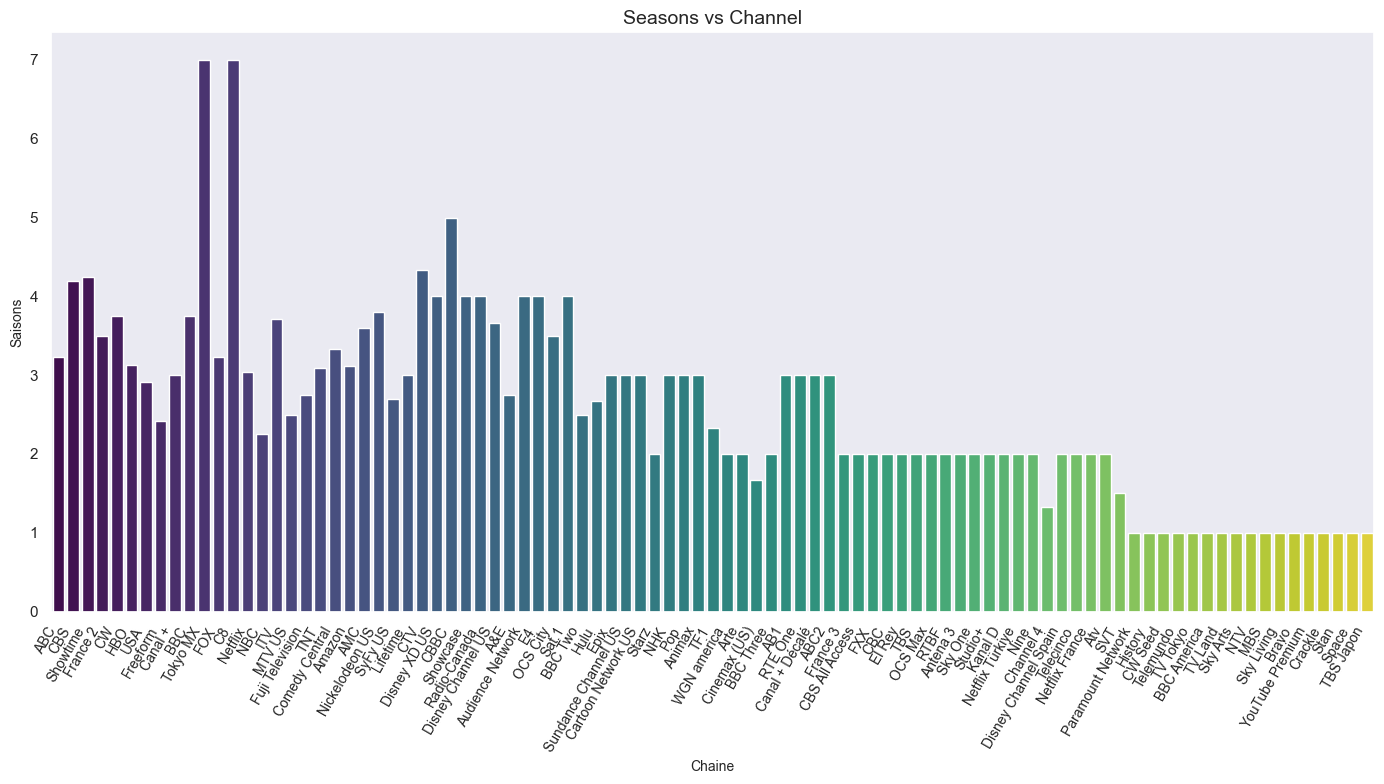

In [33]:
df = df.sort_values(by='Saison', ascending=False)
sns.set_theme(style="dark")
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Channel', y='Saison', palette='viridis', ci=None)
plt.title('Seasons vs Channel', fontsize=14)
plt.xlabel('Chaine', fontsize=10)
plt.ylabel('Saisons', fontsize=10)
plt.xticks(rotation=60, fontsize=10, ha='right')
plt.tight_layout()
plt.show()

### **Durée en fonction du genre**

D'abord, dans une liste, on recupère chaque genre par individu :

- On les séparent sur la base de la virgule à l'aide de la fonction split(" , ")

- Ensuite on supprime les espaces qu'il reste dans chaque élément (on les néttoie)

- Le résultat obtenu pour chaque observation est une liste*
     
- Et chque liste obtenue est rangée dans une grande liste

In [34]:
grand_list = []

for ele in df['Genre']:
    if isinstance(ele, str):
        each = ele.split(" , ")
        each = [g.strip() for g in each]
        grand_list.append(each)
    else:
        grand_list.append(ele)

print(grand_list[:30])

[['Comédie', 'Famille'], ['Drame', 'Policier'], ['Drame', 'Thriller'], ['Comédie'], ['Drame', 'Policier'], ['Drame', 'Fantastique', 'Action'], ['Drame', 'Fantastique'], ['Drame', 'Fantastique', 'Romance'], ['Comédie', 'Drame', 'Judiciaire'], ['Drame', 'Policier'], ['Drame'], ['Drame', 'Judiciaire'], ['Policier', 'Thriller'], ['Drame', 'Fantastique'], ['Drame', 'Guerre'], ['Comédie'], ['Drame', 'Policier', 'Thriller'], ['Aventure', 'Drame', 'Policier'], ['Aventure', 'Comédie', 'Epouvante-horreur', 'Action', 'Animation'], ['Drame', 'Fantastique', 'Espionnage', 'Action'], ['Comédie'], ['Comédie'], ['Comédie', 'Drame', 'Policier'], ['Comédie', 'Drame', 'Animation'], ['Comédie'], ['Comédie', 'Comédie musicale'], ['Drame', 'Thriller', 'Judiciaire'], ['Drame', 'Policier'], ['Drame'], ['Aventure', 'Drame', 'Science fiction']]


Ensuite ce qu'on va chercher a faire cest de créer un dataframe dans lequel on va avoir :
   - Pour une obervation, une colonne pour chaque genre avec la durée

Pour connaitre alors le nombre de colonnes à créer pour les genre, on boucle sur chaque liste de grand_list:

In [35]:
ls = []
for nb_genr in grand_list:
    ls.append(len(nb_genr))
   
max(ls) # Colonnes max a créer = 5

5

In [36]:
# On crée alors un df avec 5 colonnes Genre 1, 2, ..., 5
genre_df = pd.DataFrame(grand_list, columns=[f'Genre{i+1}' for i in range(5)])
genre_df.head()

,Genre1,Genre2,Genre3,Genre4,Genre5
0,Comédie,Famille,None,None,None
1,Drame,Policier,None,None,None
2,Drame,Thriller,None,None,None
3,Comédie,None,None,None,None
4,Drame,Policier,None,None,None


Les durées sont ensuite nettoyées :
- On supprime les 'min' dans chaque valeur
- On remplace les valeurs manquantes par des 0
- On convertit les valeurs en int

Enfin on join les deux df (horizontalement)

In [37]:
df['Duration'] = df['Duration'].str.replace('min', '').fillna('0').astype(int)
df = pd.concat([df, genre_df], axis=1)
df.head()

,Titre,Nationality,Channel,Actor,Genre,Duration,Date,StartY,EndY,Saison,Genre1,Genre2,Genre3,Genre4,Genre5
234,Modern Family,U.S.A.,ABC,Ed O'Neill;Julie Bowen;Ty Burrell,"Comédie , Famille",22,2009 - 2020,2009,2020,11,Comédie dramatique,Policier,None,None,None
28,Hawaii Five-0 (2010),U.S.A.,CBS,Alex O'Loughlin;Scott Caan;Chi McBride,"Drame , Policier",42,2010 - 2020,2010,2020,10,Drame,None,None,None,None
167,Homeland,U.S.A.,Showtime,Claire Danes;Mandy Patinkin;Maury Sterling,"Drame , Thriller",42,2011 - 2020,2011,2020,9,Drame,Epouvante-horreur,Fantastique,None,None
58,The Middle,U.S.A.,ABC,Patricia Heaton;Neil Flynn;Eden Sher,Comédie,22,2009 - 2018,2009,2018,9,Aventure,Action,Animation,None,None
77,Caïn,France,France 2,Julien Baumgartner;Julie Delarme;David Baiot,"Drame , Policier",52,2012 - 2020,2012,2020,8,Aventure,Science fiction,Action,None,None


On va ensuite melt (renverser en qlq sorte le dataframe) pour avoir tous les genres dans une même colonne avec la durée en face

In [38]:
df2 = df.melt(id_vars=['Duration'], value_vars=['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5'], var_name='Genre')
df2.drop(columns=['Genre'], inplace=True) # la colonne 'Genre' (qui contient finalement (après le melt) les colonnes Genre1, 2, ..., 5) est ensuite supprimée 

# On aggrège ensuite les durées par genre en les moyennant pour chaque genre
pargenre = df2.groupby('value')['Duration'].mean()
pargenre.head()

value
Action           42.545455
Animation        39.923077
Arts Martiaux    37.000000
Aventure         38.080000
Biopic           52.000000
Name: Duration, dtype: float64

On peut ensuite afficher le résultat sous forme de graphique à bar (barplot)

<function matplotlib.pyplot.show(close=None, block=None)>

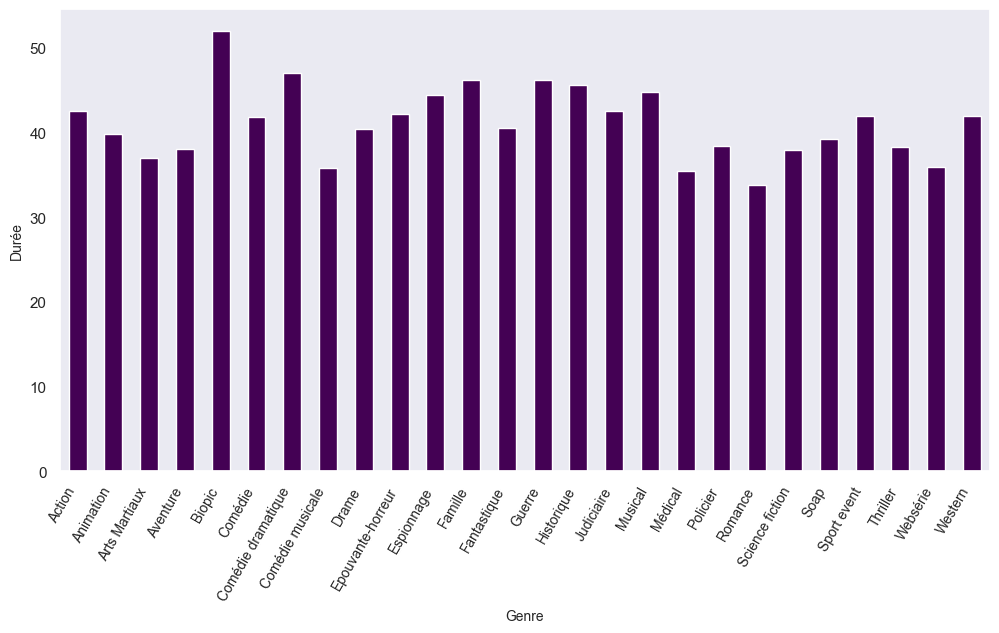

In [39]:
pargenre.plot(kind='bar', colormap='viridis', figsize=(12, 6))
plt.xlabel('Genre', fontsize = 10)
plt.ylabel('Durée', fontsize = 10)
plt.xticks(rotation=60, fontsize=10, ha= 'right')
plt.show

### **Nombre de séries par année**

In [40]:
df3 = df[['Titre', 'StartY', 'EndY']] # On récupère les 3 colonnes qui nous interresse ici

Dans un premier temps, Pour savoir la période sur laquelle on va travailler on determine les années minimales et maximales

In [41]:
mn = df3['StartY'].min()
mx = df3['EndY'].max()

On crée une list contenant toute les années de l'année minimal à l'année max

Pourquoi on crée cette liste car elle va nous servir a nommer les colonnes de notre df

Dans ce df, on va avoir pour chaque année (en colonne et les films en ligne) si le film a été diffusé sur cette période la valeur de 1 à l'intersection 

In [42]:
years = list(range(mn, mx + 1))
df_anne = pd.DataFrame(0, index=df3.index, columns=years) # On met 0 comme valeur par defaut pour chaque obervation

for index, row in df3.iterrows(): # ici on va boucler sur chque ligne (df.interrows())
    start = int(row['StartY']) # on récupère la date de debut
    end = int(row['EndY']) # et celle de fin
    df_anne.loc[index, start:end] += 1 #et on ajoute 1 si pour ce film l'année (en colonne) se situe entre sa date de debut et de fin
    # En gros si pour cette année la (en colonne) le film a été diffusé on va avoir comme valeur 1
    
yearly_counts = df_anne.sum(axis=0) # Puis on somme toutes les lignes ce qui va donner pour chaque colonne (année) le nombre de film diffusé
print(yearly_counts)

2009     34
2010     70
2011    100
2012    128
2013    157
2014    163
2015    176
2016    180
2017    168
2018    131
2019     87
2020     44
dtype: int64


On peut maintenant présenter les résultats obtenus

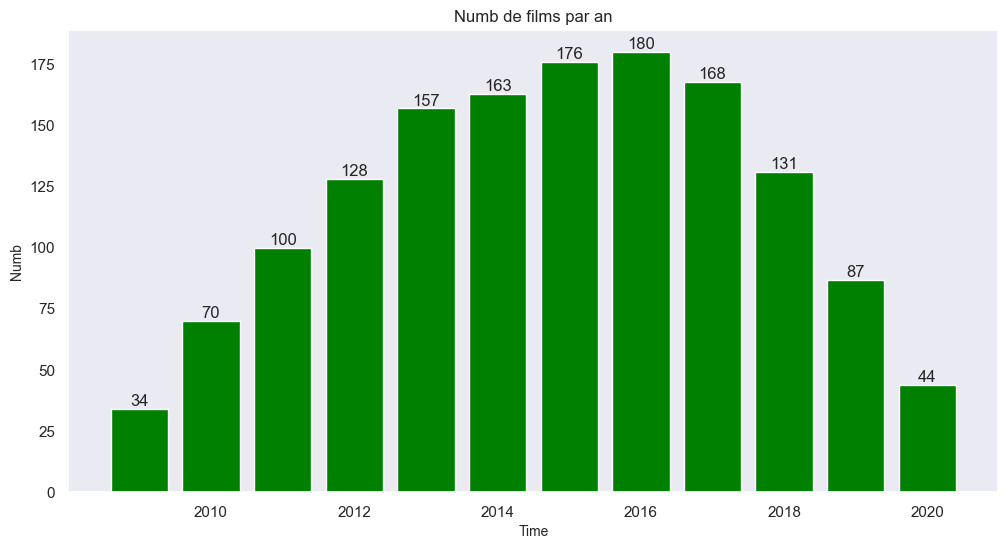

In [43]:
plt.figure(figsize=(12, 6))
bars = plt.bar(yearly_counts.index, yearly_counts.values, color='green')
plt.xlabel('Time', fontsize=10)
plt.ylabel('Numb', fontsize=10)
plt.title('Numb de films par an', fontsize=12)

# Annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

## Partie 2 : Réseau

In [44]:
df.head()

,Titre,Nationality,Channel,Actor,Genre,Duration,Date,StartY,EndY,Saison,Genre1,Genre2,Genre3,Genre4,Genre5
234,Modern Family,U.S.A.,ABC,Ed O'Neill;Julie Bowen;Ty Burrell,"Comédie , Famille",22,2009 - 2020,2009,2020,11,Comédie dramatique,Policier,None,None,None
28,Hawaii Five-0 (2010),U.S.A.,CBS,Alex O'Loughlin;Scott Caan;Chi McBride,"Drame , Policier",42,2010 - 2020,2010,2020,10,Drame,None,None,None,None
167,Homeland,U.S.A.,Showtime,Claire Danes;Mandy Patinkin;Maury Sterling,"Drame , Thriller",42,2011 - 2020,2011,2020,9,Drame,Epouvante-horreur,Fantastique,None,None
58,The Middle,U.S.A.,ABC,Patricia Heaton;Neil Flynn;Eden Sher,Comédie,22,2009 - 2018,2009,2018,9,Aventure,Action,Animation,None,None
77,Caïn,France,France 2,Julien Baumgartner;Julie Delarme;David Baiot,"Drame , Policier",52,2012 - 2020,2012,2020,8,Aventure,Science fiction,Action,None,None


Dans un premier on va récupérer tous les genres de notre jeu de données :

In [45]:
all_genres = [pd.Series(grand_list).explode().values]
all_genres = pd.Series(all_genres[0])

Ensuite on peut voir la distribution des différents genres

In [46]:
genres_uniques = all_genres.unique()
genre_counts = all_genres.value_counts()

print(f"""Liste des genres : 
{genres_uniques}

=====================================================
      
Distribution des genres :
 
{genre_counts.head(15)}""") # 15 genres les plus représentés

Liste des genres : 
['Comédie' 'Famille' 'Drame' 'Policier' 'Thriller' 'Fantastique' 'Action'
 'Romance' 'Judiciaire' 'Guerre' 'Aventure' 'Epouvante-horreur'
 'Animation' 'Espionnage' 'Comédie musicale' 'Science fiction'
 'Arts Martiaux' 'Western' 'Médical' 'Historique' 'Soap' 'Musical'
 'Comédie dramatique' 'Biopic' 'Websérie' 'Sport event']

      
Distribution des genres :
 
Drame                 213
Comédie               114
Policier               71
Thriller               63
Fantastique            53
Action                 44
Science fiction        38
Animation              26
Aventure               25
Comédie dramatique     23
Romance                17
Epouvante-horreur      16
Historique             16
Judiciaire             14
Espionnage             10
Name: count, dtype: int64


In [47]:
cooccurrence_matrix = pd.DataFrame(0, index=genres_uniques, columns=genres_uniques)
for i in range(len(all_genres)):
    for j in range(i, len(all_genres)):
        genre_i = all_genres[i]
        genre_j = all_genres[j]
        cooccurrence_matrix.at[genre_i, genre_j] += 1
        if genre_i != genre_j:
            cooccurrence_matrix.at[genre_j, genre_i] += 1

# print(cooccurrence_matrix) # pour afficher la matrice mais vu quelle est trop grande on la laisse en commentaire si vous voulez la voir

Maintenant on va représenter notre réseau sur un graphe où les noeuds auront une taille proportionnelle à la fréquence dans la matrice de cooccurence et où les arêtes (liens) auront proportionnelles à la co-occurrence

In [48]:
R = nx.Graph()

# Graphe G auquel on ajoute des noeuds
for genre in genres_uniques:
    R.add_node(genre, size=genre_counts[genre])

Puis on ajoute les arêtes

In [49]:
for i in cooccurrence_matrix.index:
    for j in cooccurrence_matrix.columns:
        if cooccurrence_matrix.at[i, j] > 0:
            R.add_edge(i, j, weight=cooccurrence_matrix.at[i, j])

R.remove_edges_from(nx.selfloop_edges(R))  # supprimer les boucles (les neouds sont liés à eux même donc on retire cette liaison)

Maitenant que les noeuds et les arrêtes ont étés ajoutées au graphe, on va maitenant définir leur taille, leur poids et leur position en fonction de la matrice de cooccurence

In [50]:
# La taille qu'on prend en racine carré sinon les noeuds sonr trop grands
node_sizes = [np.sqrt(R.nodes[genre]['size'] + 1) * 100 for genre in R.nodes]

# Le poids
edge_weights = [R.edges[edge]['weight'] * 0.05 for edge in R.edges]

# La position
pos = nx.spring_layout(R, k=1, iterations=100, seed=42)

# Couleurs des nœuds
node_colors = sns.color_palette("husl", len(R.nodes))

On obtient le graphique ci-dessous qui

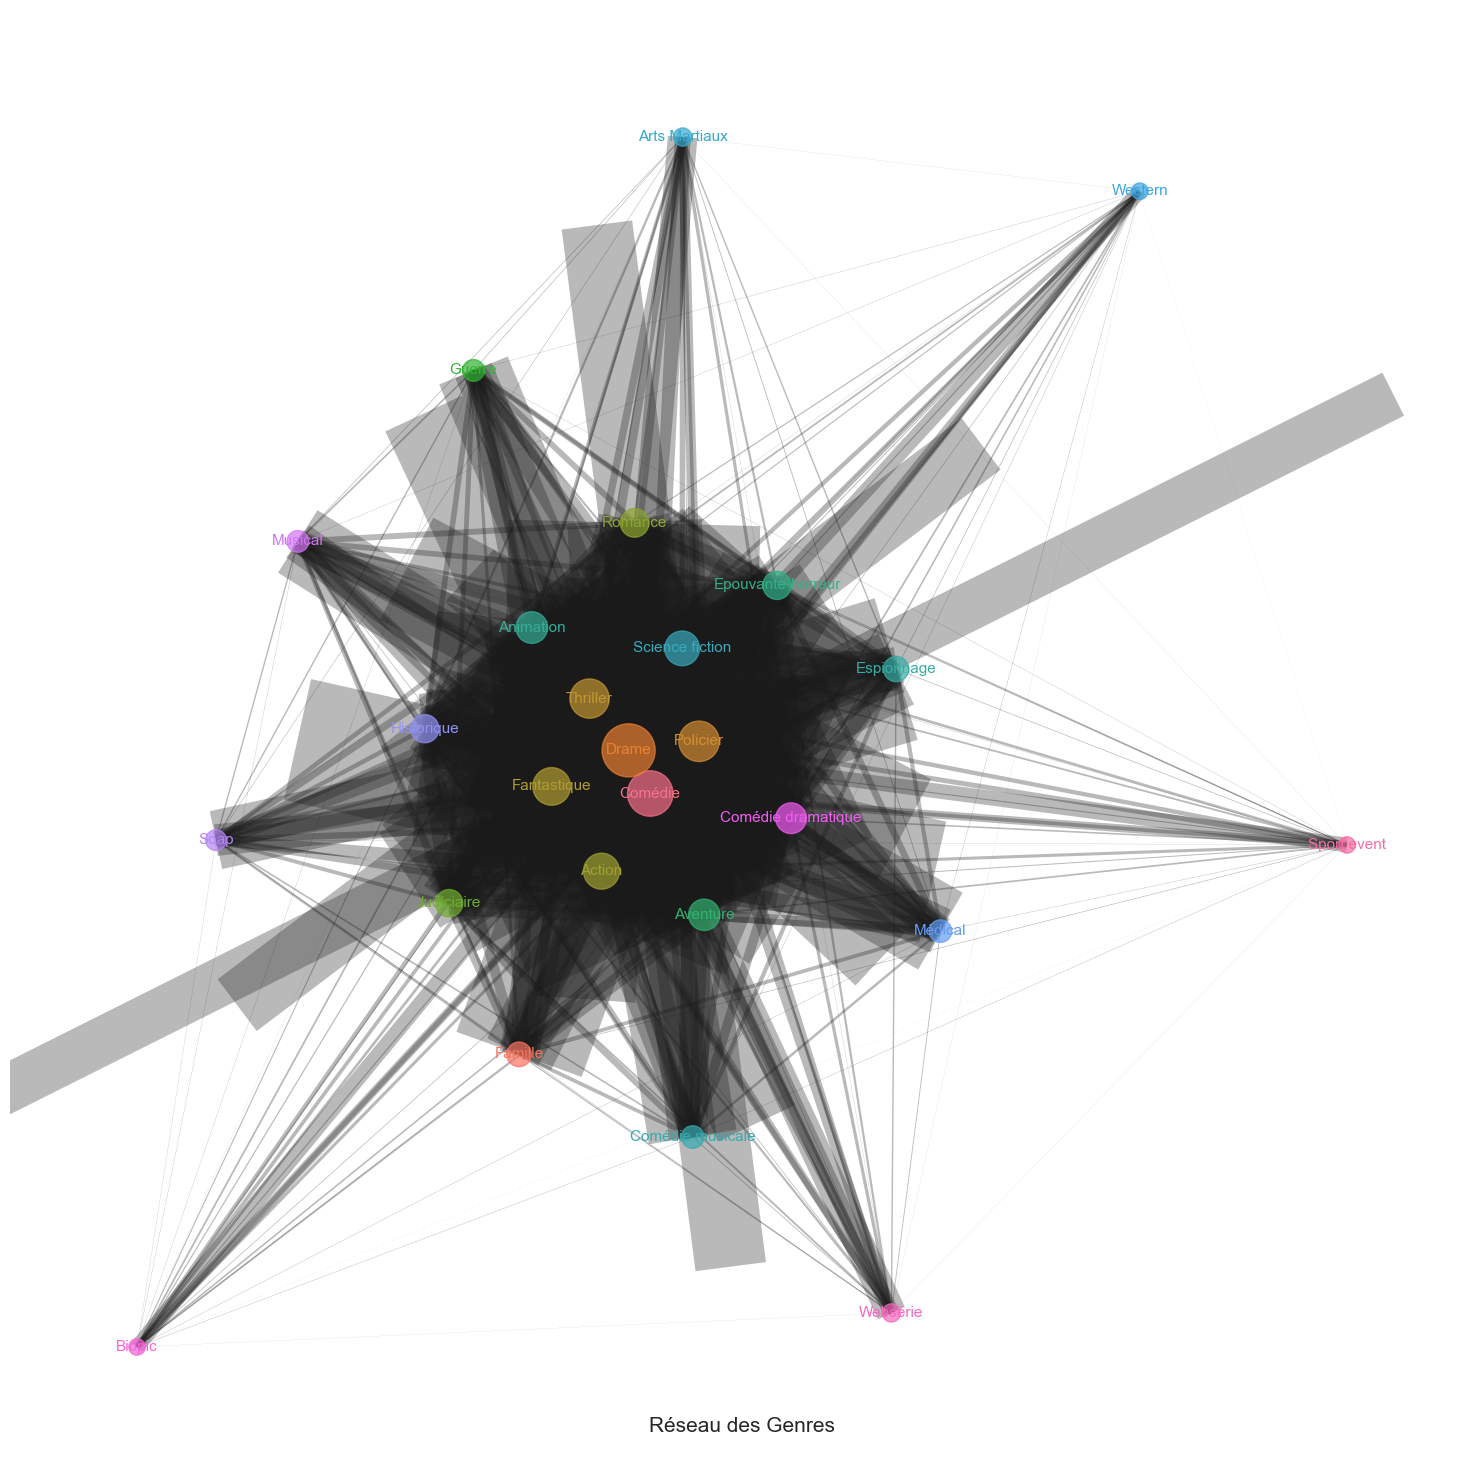

In [51]:
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(R, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(R, pos, width=edge_weights, alpha=0.3)
nx.draw_networkx_labels(R, pos, font_size=11, font_weight=550, font_color=dict(zip(R.nodes, node_colors)), font_family='sans-serif')
plt.axis('off')
plt.tight_layout()
plt.suptitle("Réseau des Genres", fontsize=15, y=0.05)
plt.show()